<font color = green >

# <center>Homework<center>
</font>

__Exploratory Data Analysis (EDA)__ of car insurance dataset.
    
__Dataset description:__ Car insurance claim. As you are working in the insurance company. Company wants to know the reason why claim was not made. Doing so would allow insurance company to improve there policy for giving loan to the customer. In this project you are dealing with various feature such as age, occupation etc. based on that let's get back to the final conculsion.    

__Steps:__
- Data Cleaning
- Descriptive Statistics
- Data Visualization
- Conclusions

In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Car_Insurance_Claim.csv", index_col='ID')
df.drop(columns='Unnamed: 0', inplace=True)
df.columns = df.columns.str.lower()
df.rename(columns={'duis': 'dui_violations'}, inplace=True) # dui = driving under the influence
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,dui_violations,past_accidents,outcome
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


<p style="color:red;">Disclaimer: this notebook contains a lot of thinking process, presented here in educational purposes only. Main conclusions are at the end.</p>

# **Data Cleaning**

In [425]:
df.info()
df.index.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  9950 non-null   object
 1   gender               9950 non-null   object
 2   race                 9951 non-null   object
 3   driving_experience   9950 non-null   object
 4   education            9951 non-null   object
 5   income               10000 non-null  object
 6   credit_score         8978 non-null   object
 7   vehicle_ownership    9950 non-null   object
 8   vehicle_year         9950 non-null   object
 9   married              9952 non-null   object
 10  children             9950 non-null   object
 11  postal_code          9950 non-null   object
 12  annual_mileage       9000 non-null   object
 13  vehicle_type         9951 non-null   object
 14  speeding_violations  9950 non-null   object
 15  dui_violations       9950 non-null   object
 16

Int64Index([569520, 750365, 199901, 478866, 731664, 877557, 930134, 461006,
             68366, 445911,
            ...
            302403,  67445, 188300, 156495, 752887, 323164, 910346, 468409,
            903459, 442696],
           dtype='int64', name='ID', length=10000)

- Dataset contains a total of 10k entries, and the ID column contains 10k unique entries, so it is a valid index. Therefore the Unnamed column was dropped correctly.
- All the columns are objects, either because of NaNs or because all the data is stored as strings.
- Only the INCOME column has no null values, but it is still object, so I assume that all values in the dataset are strings.
- Most of the columns have exactly 9950 or 9951 non-null values. Maybe there are 50 empty rows?
- CREDIT_SCORE is the column with the biggest number of null values.

In [426]:
df[df['age'].isna()]

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,dui_violations,past_accidents,outcome
ID,,,,,,,,,,,,,,,,,,
22475,NaN,female,majority,0-9y,high school,middle class,0.5905674346205279,1.0,before 2015,1.0,0.0,10238,11000.0,sedan,0,0,0,0.0
55182,NaN,female,majority,10-19y,high school,working class,0.5178262960914578,1.0,after 2015,0.0,0.0,32765,10000.0,sedan,2,0,0,0.0
626735,NaN,female,majority,0-9y,university,working class,NaN,1.0,none,0.0,0.0,32765,13000.0,sedan,0,0,0,0.0
420204,NaN,male,majority,20-29y,university,upper class,0.7459522237963077,1.0,before 2015,1.0,1.0,10238,9000.0,sedan,2,0,3,0.0
45019,NaN,female,majority,0-9y,university,middle class,0.6714519317340388,0.0,before 2015,0.0,1.0,92101,14000.0,sedan,0,0,0,0.0
50734,NaN,female,majority,0-9y,none,poverty,0.3307771935047669,0.0,NaN,1.0,1.0,10238,13000.0,sedan,0,0,0,1.0
67899,NaN,male,majority,30y+,high school,upper class,NaN,1.0,after 2015,1.0,1.0,10238,7000.0,sedan,5,NaN,11,0.0
183837,NaN,female,majority,20-29y,university,upper class,0.5172578396228402,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,1,0,0,0.0
976721,NaN,female,majority,20-29y,university,upper class,0.6518121915052597,1.0,after 2015,1.0,1.0,10238,7000.0,sedan,2,0,4,0.0


- So 50 NA's exactly in almost every column is likely just a coincidence.

In [427]:
df.describe()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,dui_violations,past_accidents,outcome
count,9950,9950,9951,9950,9951,10000,8978,9950,9950,9952,9950,9950,9000,9951,9950,9950,9950,9950
unique,5,3,3,5,3,4,8929,3,3,3,3,9,22,3,22,8,16,3
top,26-39,female,majority,0-9y,high school,upper class,none,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
freq,3035,4968,8919,3503,4116,4336,50,6907,6896,4972,6815,6223,1244,9432,4978,8041,5528,6795


- Postal Code column has only 9 unique values wich may possibly mean that the data has been gathered in one location only, and that will be the problem if need to make conclusion for a bigger area or our model trained on this data is supposed to work on bigger area.
- Annual mileage also has not so many unique values which is suspicios. Maybe the mileage was rounded? Or the data was gathered with low precision?

Let's check all the columns for null values that are not NaN and for values that look like null but are actually a category. In the first case we want to replace them with NaN and in the second case we might want to rename them.

In [428]:
noncat_columns = ['credit_score', 'postal_code', 'annual_mileage', 'speeding_violations', 'dui_violations', 'past_accidents']
pd.crosstab(**df.iloc[:, ~df.columns.isin(noncat_columns)].melt(var_name='columns', value_name='index'))

columns,age,children,driving_experience,education,gender,income,married,outcome,race,vehicle_ownership,vehicle_type,vehicle_year
index,,,,,,,,,,,,
0-9y,0,0,3503,0,0,0,0,0,0,0,0,0
0.0,0,3085,0,0,0,0,4972,6795,0,2993,0,0
1.0,0,6815,0,0,0,0,4930,3105,0,6907,0,0
10-19y,0,0,3264,0,0,0,0,0,0,0,0,0
16-25,1995,0,0,0,0,0,0,0,0,0,0,0
20-29y,0,0,2093,0,0,0,0,0,0,0,0,0
26-39,3035,0,0,0,0,0,0,0,0,0,0,0
30y+,0,0,1040,0,0,0,0,0,0,0,0,0
40-64,2907,0,0,0,0,0,0,0,0,0,0,0


'none' value is really popular here.
- It seems that 'none' value ought to be replaced with NaN as their meaning is NA in listed columns: Age, Children, Driving Experience, Gender, Married, Outcome, Race, Vehicle Ownership, Vehicle Year.
- Although, for column Vehicle Type we should consider changing 'none' to 'Other' and in column Education 'none' can mean 'No education'. And there are actualy 1947 'none' values in Education so I'm sure about that one.

But first, I'd like to check why so many columns have 50 NAs exactly.

In [429]:
df[df['age'] == 'none'].apply(lambda x: x[x == 'none'].count())

age                    50
gender                  1
race                    0
driving_experience      0
education              12
income                  0
credit_score            0
vehicle_ownership       0
vehicle_year            0
married                 0
children                0
postal_code             1
annual_mileage          0
vehicle_type            0
speeding_violations     1
dui_violations          1
past_accidents          0
outcome                 0
dtype: int64

In [430]:
df[df['children'] == 'none'].apply(lambda x: x[x == 'none'].count())

age                     0
gender                  0
race                    0
driving_experience      0
education              15
income                  0
credit_score            0
vehicle_ownership       1
vehicle_year            0
married                 0
children               50
postal_code             0
annual_mileage          0
vehicle_type            0
speeding_violations     0
dui_violations          1
past_accidents          0
outcome                 0
dtype: int64

In [431]:
df[df['outcome'] == 'none'].apply(lambda x: x[x == 'none'].count())

age                     0
gender                  0
race                    1
driving_experience      1
education              10
income                  0
credit_score            1
vehicle_ownership       0
vehicle_year            1
married                 0
children                0
postal_code             0
annual_mileage          0
vehicle_type            0
speeding_violations     0
dui_violations          0
past_accidents          0
outcome                50
dtype: int64

- My suspicion was false: these 50 NaNs are spread randomly and do not cross in same 50 rows. So I will just go on with them and change them to np.nan.

- Still, I don't see how records without Outcome can help in my analysis, so I will drop them.

- In columns that are not categorical and are not shown above, 'none' could mean 0, but since there are lot of actual 0's in each column, I assume that 'none' value here mean NA. Now only Annual Mileage should be also checked for zeros.

In [432]:
df['annual_mileage'].value_counts()

11000.0    1244
12000.0    1200
13000.0    1133
10000.0    1060
14000.0     881
9000.0      841
15000.0     626
8000.0      552
16000.0     416
7000.0      317
17000.0     242
6000.0      165
18000.0     103
5000.0       65
none         50
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: annual_mileage, dtype: int64

- And really, 'none' here migh have meant a 0 mileage. But since 3k and 2k values are so rare, I suppose that zero mileage wouldn't have much sence here. And since there are 50 'none' values they cannot mean 0s. Thus they should also be marked np.nan.
- Also, it looks like the values are rounded to thouthands. Thats okay, but for model training we could use some scaling.

In [433]:
df.loc[:, df.columns != 'education'] = df.loc[:, df.columns != 'education'].replace('none', np.nan)
df['education'].replace('none', 'no degree', inplace=True)
df = df[~df['outcome'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9900 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  9801 non-null   object
 1   gender               9801 non-null   object
 2   race                 9804 non-null   object
 3   driving_experience   9801 non-null   object
 4   education            9852 non-null   object
 5   income               9900 non-null   object
 6   credit_score         8839 non-null   object
 7   vehicle_ownership    9801 non-null   object
 8   vehicle_year         9801 non-null   object
 9   married              9803 non-null   object
 10  children             9802 non-null   object
 11  postal_code          9801 non-null   object
 12  annual_mileage       8859 non-null   object
 13  vehicle_type         9803 non-null   object
 14  speeding_violations  9801 non-null   object
 15  dui_violations       9801 non-null   object
 16 

In [434]:
df['postal_code'].unique()

array(['10238', '32765', '32765.0', '10238.0', '92101', '21217',
       '92101.0', '21217.0', nan], dtype=object)

- Looks like there are even less unique postal codes than I thought. Let's merge the duplicates.

In [435]:
df['postal_code'] = df['postal_code'].apply(lambda x: x if x is np.nan else x.rstrip('.0'))
df['postal_code'].unique()

array(['10238', '32765', '92101', '21217', nan], dtype=object)

Last step in cleaning data: changing type for numeric columns.

In [436]:
numeric_columns = ['credit_score', 'vehicle_ownership', 'married', 'children', 'annual_mileage', 
                   'speeding_violations', 'dui_violations', 'past_accidents', 'outcome']
df[numeric_columns] = df[numeric_columns].astype(np.float64)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9900 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9801 non-null   object 
 1   gender               9801 non-null   object 
 2   race                 9804 non-null   object 
 3   driving_experience   9801 non-null   object 
 4   education            9852 non-null   object 
 5   income               9900 non-null   object 
 6   credit_score         8839 non-null   float64
 7   vehicle_ownership    9801 non-null   float64
 8   vehicle_year         9801 non-null   object 
 9   married              9803 non-null   float64
 10  children             9802 non-null   float64
 11  postal_code          9801 non-null   object 
 12  annual_mileage       8859 non-null   float64
 13  vehicle_type         9803 non-null   object 
 14  speeding_violations  9801 non-null   float64
 15  dui_violations       9801 non-n

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,dui_violations,past_accidents,outcome
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0.0,0.0,0.0,0.0
750365,16-25,male,majority,0-9y,no degree,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0.0,0.0,0.0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0.0,0.0,0.0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,NaN,32765,11000.0,sedan,0.0,0.0,0.0,0.0
731664,26-39,male,majority,10-19y,no degree,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2.0,0.0,1.0,1.0


- Now, the dataset is clean and it consists of 9900 rows with not-null ID, Income and Outcome. Other columns have up to 100 null values. Credit Score column has the most - about 1100 null values.
- There are numerical, categorical and string columns which we need to approach differently.

# **Descriptive Statistics**

In [437]:
df.describe()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,dui_violations,past_accidents,outcome
count,8839.000000,9801.000000,9803.000000,9802.000000,8859.000000,9801.000000,9801.000000,9800.000000,9900.000000
mean,0.515663,0.697480,0.497399,0.687819,11704.368439,1.479441,0.238547,1.057857,0.313636
std,0.137664,0.459373,0.500019,0.463407,2822.408576,2.238032,0.554230,1.654953,0.463994
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.417131,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,0.524603,1.000000,0.000000,1.000000,12000.000000,0.000000,0.000000,0.000000,0.000000
75%,0.618302,1.000000,1.000000,1.000000,14000.000000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.000000,15.000000,1.000000


In [438]:
df[numeric_columns].astype('object').describe()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,dui_violations,past_accidents,outcome
count,8839.000000,9801.0,9803.0,9802.0,8859.0,9801.0,9801.0,9800.0,9900.0
unique,8839.000000,2.0,2.0,2.0,21.0,21.0,7.0,15.0,2.0
top,0.629027,1.0,0.0,1.0,11000.0,0.0,0.0,0.0,0.0
freq,1.000000,6836.0,4927.0,6742.0,1224.0,4927.0,7960.0,5476.0,6795.0


In [439]:
df.describe(include='object')

,age,gender,race,driving_experience,education,income,vehicle_year,postal_code,vehicle_type
count,9801,9801,9804,9801,9852,9900,9801,9801,9803
unique,4,2,2,4,3,4,2,4,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,10238,sedan
freq,3003,4912,8829,3468,4075,4294,6836,6815,9338


- Just a curious fact: only 4k observations are married, but 6.7k have children.
- We can see that violations and accidets columns are mostly zero, and same for outcome. So I guess that there is a inverse correlation between them.
- 10238 postal code (which belongs to 6172 observations) might correspond to Vilnius, Lithuania and Galgiai, Lithuania.

In [440]:
corr_df = df.corr()
corr_df

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,dui_violations,past_accidents,outcome
credit_score,1.000000,0.311390,0.283248,0.223189,-0.176352,0.207034,0.128478,0.183496,-0.326938
vehicle_ownership,0.311390,1.000000,0.174471,0.124942,-0.098223,0.136004,0.087900,0.121449,-0.379662
married,0.283248,0.174471,1.000000,0.287861,-0.461573,0.220568,0.119133,0.215659,-0.263462
children,0.223189,0.124942,0.287861,1.000000,-0.448023,0.224679,0.114827,0.207235,-0.234049
annual_mileage,-0.176352,-0.098223,-0.461573,-0.448023,1.000000,-0.325284,-0.116658,-0.197230,0.190024
speeding_violations,0.207034,0.136004,0.220568,0.224679,-0.325284,1.000000,0.359388,0.444688,-0.291640
dui_violations,0.128478,0.087900,0.119133,0.114827,-0.116658,0.359388,1.000000,0.259158,-0.188985
past_accidents,0.183496,0.121449,0.215659,0.207235,-0.197230,0.444688,0.259158,1.000000,-0.311531
outcome,-0.326938,-0.379662,-0.263462,-0.234049,0.190024,-0.291640,-0.188985,-0.311531,1.000000


- We can see that all numerical columns are somewhat correlated with oucome. All the columns except annual_mileage are inverse correlated, which means that, for example, the lower is Credit Score, the bigger is probability of insurance claim. Outcome is also correlated with Annual Mileage wich is intuitively right.
- In my opinion, cerrelation between past violations and accidents and outcome is somewhat strange, as it is not obvious why higher number of violations can lead to lower probability of insurance claim. But if you think about it, it can be explained as that people are more causios after accidents.
- The most valuable columns are Credit Score, Vehicle Ownership, Speeding Violations and Past Accidents.

In [441]:
string_columns = df.columns[~df.columns.isin(numeric_columns)]
encoded_df = df.copy()
encoded_df[string_columns] = encoded_df[string_columns].apply(lambda x: x.astype('category').cat.codes)
cat_corr_df = encoded_df[[*string_columns, 'outcome']].corr()
cat_corr_df
# df[string_columns].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# corr_df = df[numeric_columns].dropna(how='any').corr()
# corr_df

,age,gender,race,driving_experience,education,income,vehicle_year,postal_code,vehicle_type,outcome
age,1.000000,0.002419,-0.020612,0.669855,0.141019,0.138549,-0.208989,0.008132,-0.015671,-0.435206
gender,0.002419,1.000000,-0.005093,-0.000190,0.077544,0.006780,-0.014217,0.000510,0.002436,0.102566
race,-0.020612,-0.005093,1.000000,-0.030823,-0.034452,0.002824,0.021494,0.013877,0.001797,0.011214
driving_experience,0.669855,-0.000190,-0.030823,1.000000,0.093670,0.084967,-0.152267,0.002823,-0.011206,-0.482006
education,0.141019,0.077544,-0.034452,0.093670,1.000000,0.077892,-0.105040,0.015556,-0.002930,-0.090506
income,0.138549,0.006780,0.002824,0.084967,0.077892,1.000000,-0.066363,0.018448,-0.009914,-0.048804
vehicle_year,-0.208989,-0.014217,0.021494,-0.152267,-0.105040,-0.066363,1.000000,-0.015812,0.021646,0.268097
postal_code,0.008132,0.000510,0.013877,0.002823,0.015556,0.018448,-0.015812,1.000000,-0.000214,0.117394
vehicle_type,-0.015671,0.002436,0.001797,-0.011206,-0.002930,-0.009914,0.021646,-0.000214,1.000000,0.008864
outcome,-0.435206,0.102566,0.011214,-0.482006,-0.090506,-0.048804,0.268097,0.117394,0.008864,1.000000


- Since categorical columns weren't all encoded in a right order, we cannot take the signs of correlation scores into account. Still, we can say, that most valuable string columns are Age, Driving Experience and Vehicle Year. These are super intuitive, so I have no doubt about the result.  

# **Data Visualisation**

1. Value distributions for each column.

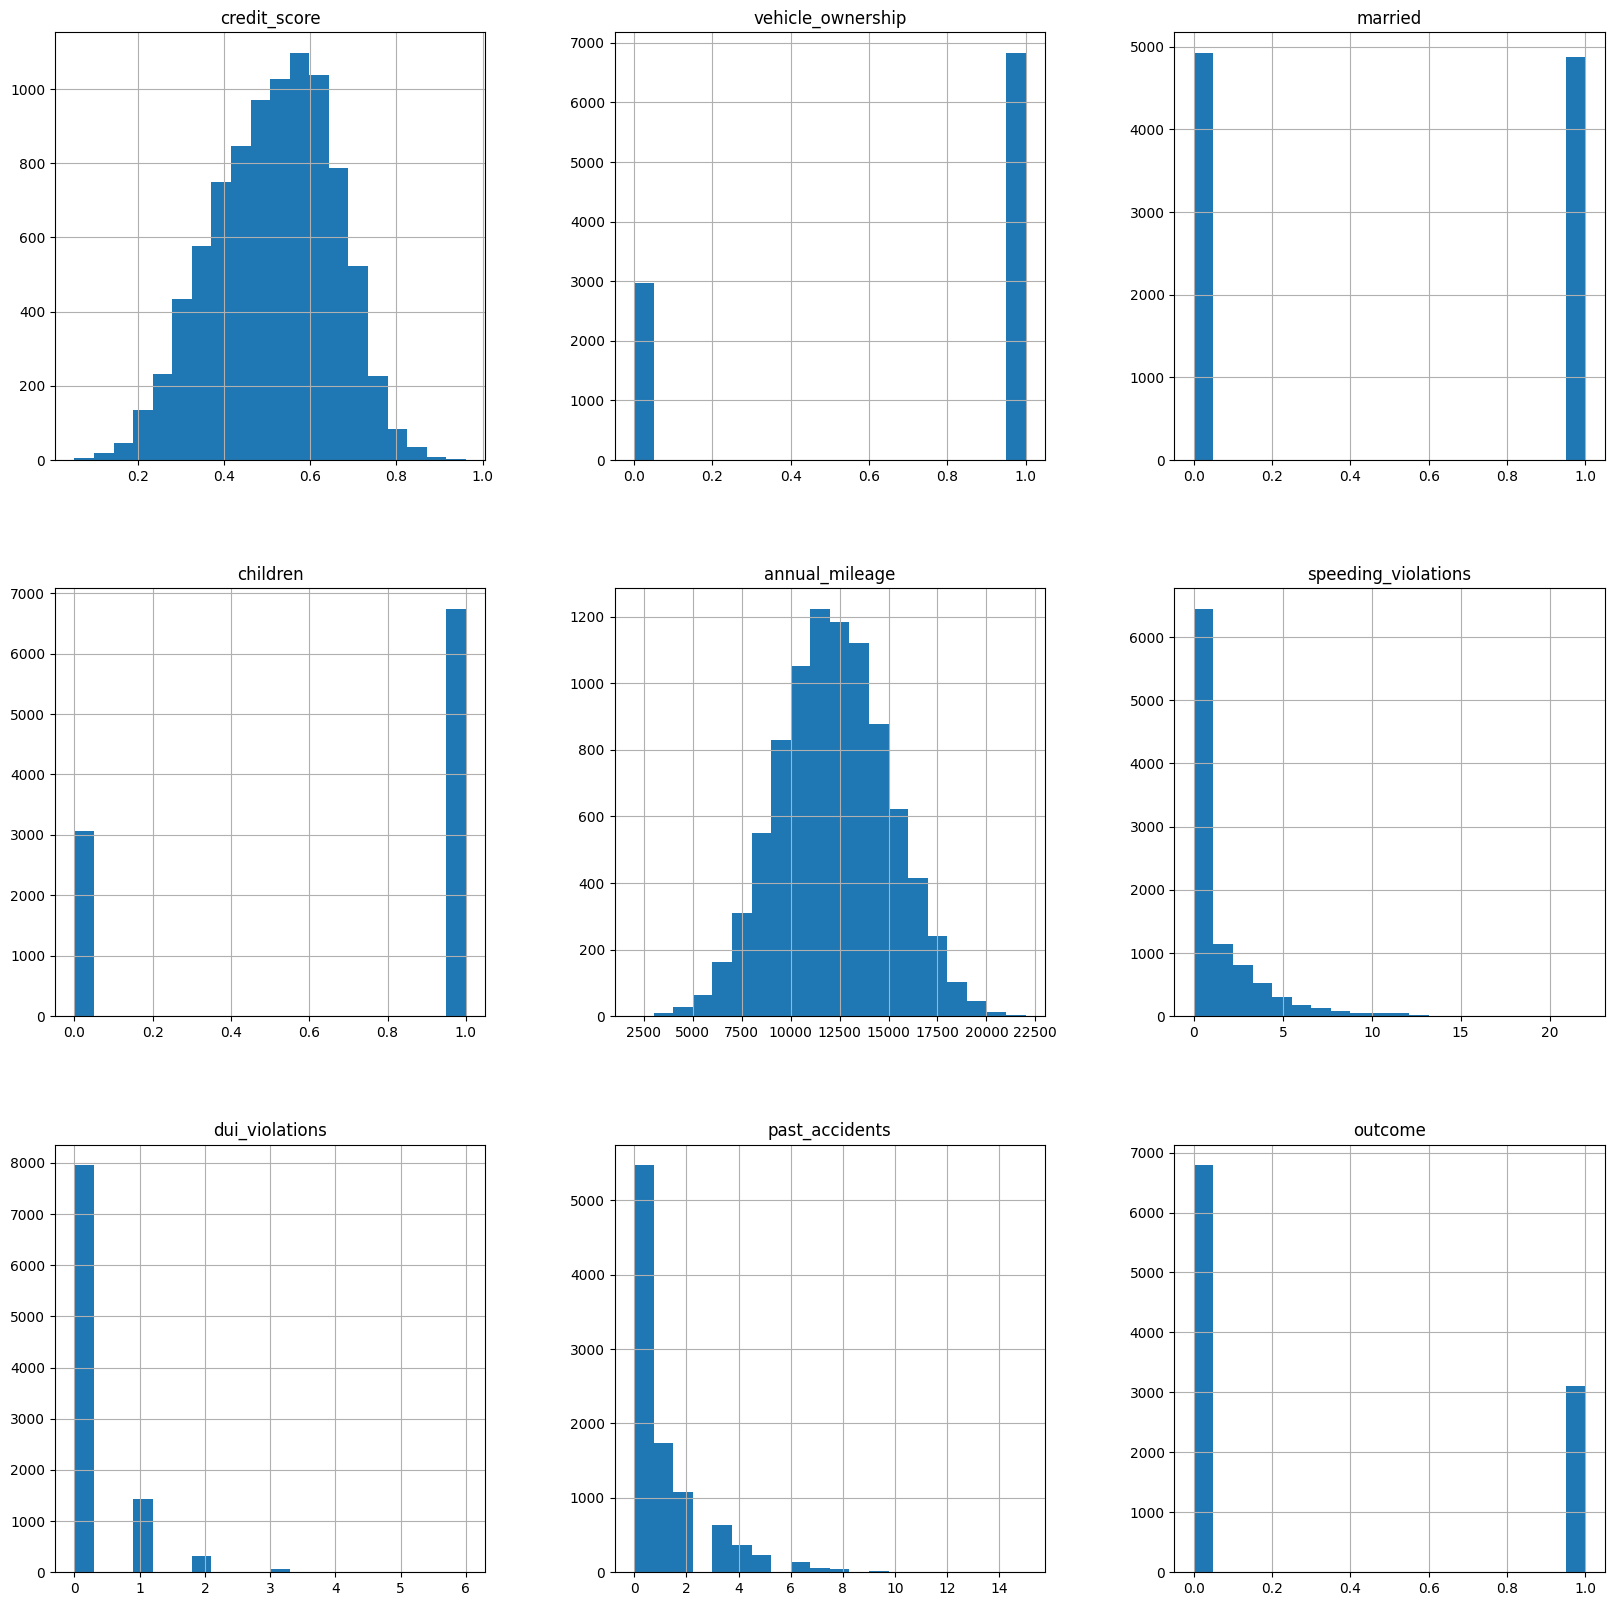

In [442]:
df.hist(figsize=(20, 20), bins=20);

- All of these seem naturally spreaded and there are no obvious outliers.
- Outcome categories are not balanced, which might be a little issue for model training.

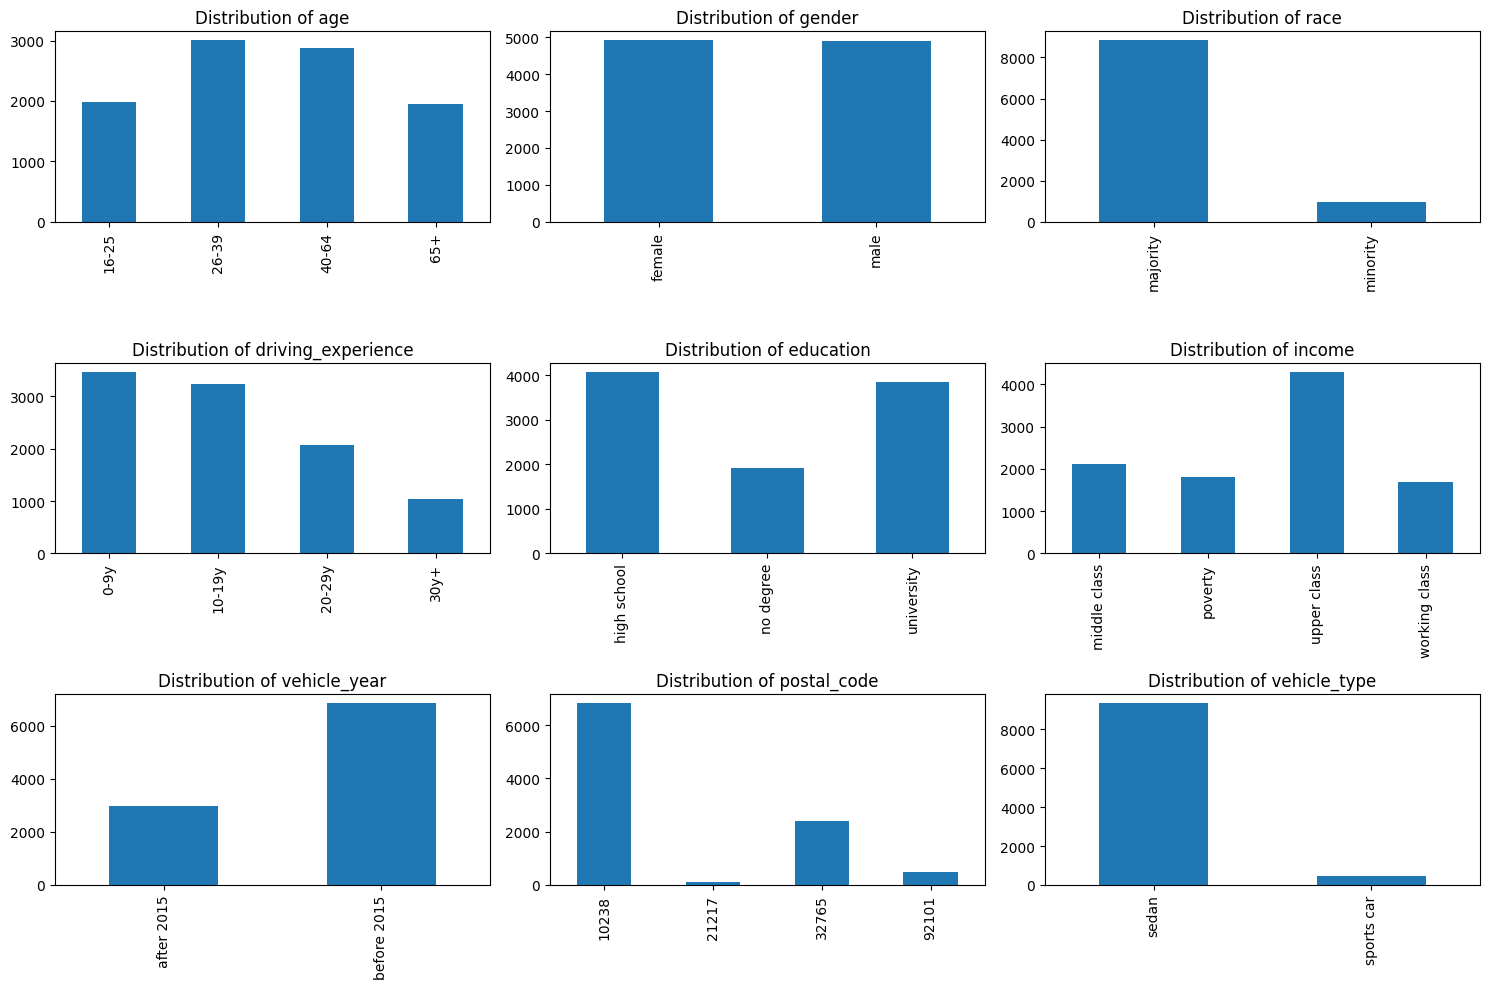

In [443]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i, column in enumerate(string_columns):
    df[column].sort_values().value_counts(sort=False).plot(kind='bar', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {column}')
plt.tight_layout()


- Distributions of race,Postal Codes and Vehicle Types are very unbalanced, so I'd not use them for model training.

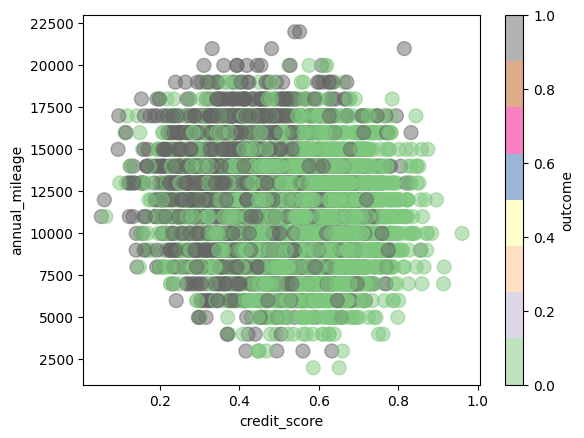

In [444]:
df.plot(kind='scatter', x='credit_score', y='annual_mileage', c='outcome', s=100, cmap='Accent', alpha=0.5);

- We can clearly see correlation with both Annual Mileage and Credit Score here. Credit Score is certainly a valuable feature. 

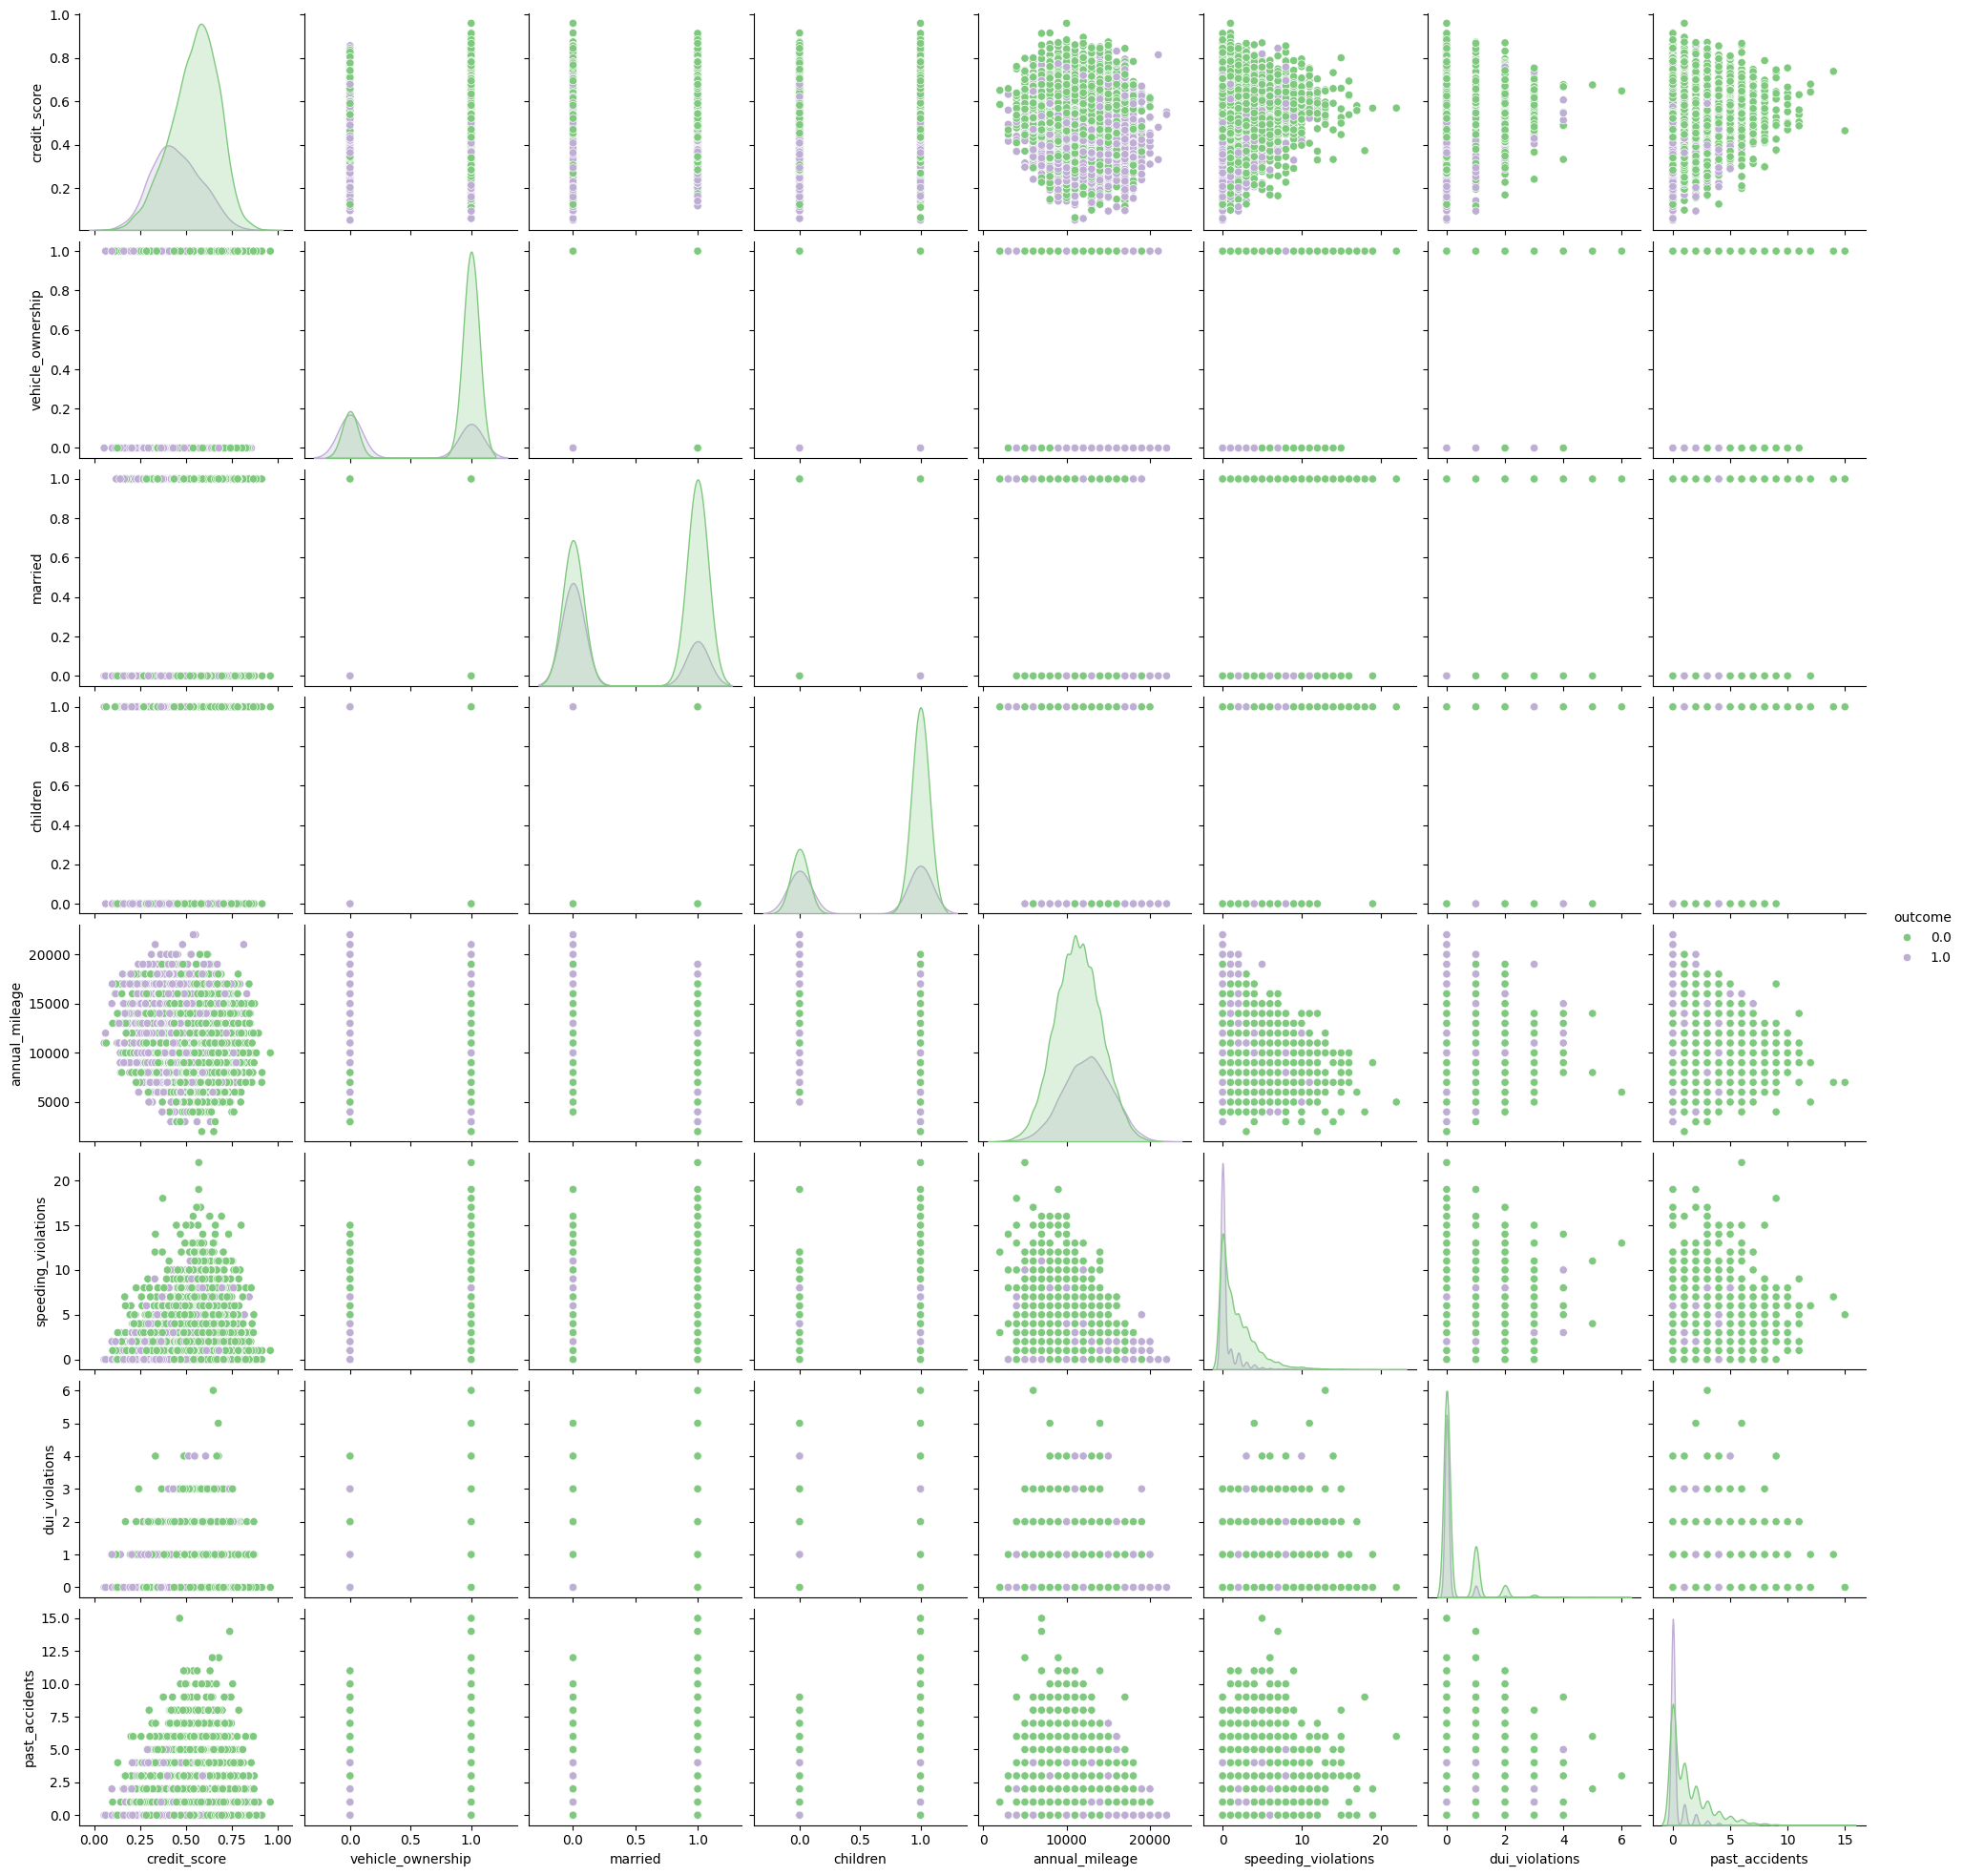

In [445]:
sns.pairplot(df, hue='outcome', palette='Accent');

- Here we can clearly see how important is Credit Score and Vehicle Ownership as they correlate with Outcome in each combination. Annual mileage is also obviously inversely correlated to Outcome.
- Also we can see some curious things. For example, one the Past Accident and Annual Mileage intersection we can see the usually the biggest number of past accidents belongs to drivers who have a medium mileage. Interestingly, such drivers are unlikely to claim insurance.

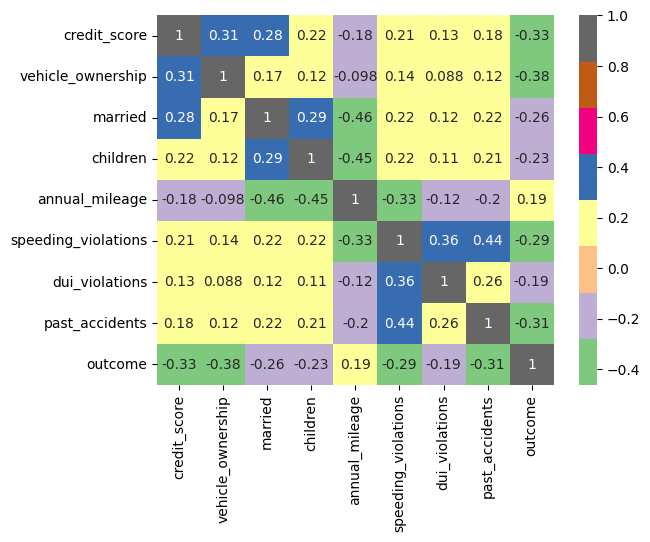

In [446]:
sns.heatmap(corr_df, annot=True, cmap='Accent');

- Intrestingly, there are groups of columns that strongly correlate with each other (blue tiles). In particular, Credit Score, Vehicle Ownership, Married, Children and Speeding, DUI and Accidents. That's a great insight for feature engineering! For example we might want to make a column called Family, or Past Violations that would aggreagete all the columns listed.
- As we already saw, Credit Score, Vehicle Ownership, Speeding Violations, and Past accidents influence Outcome the most. These columns I would advice to use for model training first hand. But actually all of the numeric columns here are somewhat useful.

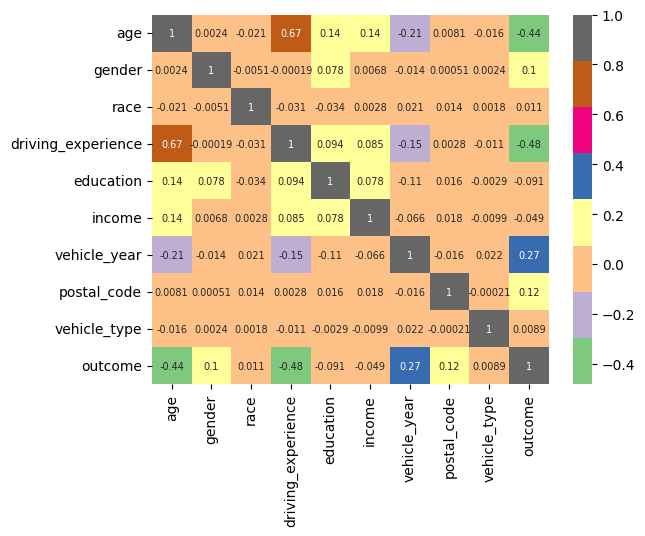

In [450]:
sns.heatmap(cat_corr_df, annot=True, cmap='Accent', annot_kws={'fontsize': 7});

- Most valuable categorical features are Age, Driving Experience and Vehicle Year. I'd recommend them for model training.
- Age and Driving experience correlate very strongly, so I suppose for model training it might be enough to keep only Driving Experience.

# **Conclusions**